In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print("seed",seed)
print("cfg_env",cfg_env)
print(datetime.datetime.now())

seed 5
cfg_env pendulum
2023-08-12 23:44:18.290768


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(1032.3962)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(4.9883)tensor(4.5724)tensor(6.1311)tensor(5.9347)tensor(8.3292)tensor(6.3369)tensor(5.3340)tensor(5.9758)tensor(4.0893)tensor(5.7615)tensor(5.9633)tensor(8.7145)tensor(3.7009)tensor(7.6655)tensor(6.3505)tensor(4.3251)tensor(3.5465)tensor(6.0675)tensor(3.9768)tensor(4.3883)tensor(3.7825)tensor(5.8445)tensor(6.8587)tensor(3.1136)tensor(8.1720)tensor(7.3626)tensor(4.5810)tensor(4.3644)tensor(3.4600)tensor(3.7291)tensor(2.4677)tensor(7.6860)tensor(7.0279)tensor(3.0079)tensor(6.6876)tensor(6.3274)tensor(4.9014)tensor(4.4100)tensor(4.3593)tensor(8.5254)tensor(4.5142)tensor(4.5085)tensor(4.5852)tensor(8.4347)tensor(8.7560)tensor(4.3496)tensor(5.3559)tensor(11.8370)tensor(4.3719)tensor(3.2111)tensor(4.9044)tensor(5.7614)tensor(4.2440)tensor(2.4057)tensor(4.3047)tensor(5.1996)tensor(7.1351)tensor(5.1427)tensor(3.1916)tensor(3.3178)tensor(4.1771)tensor(5.8098)tensor(4.1532)tensor(3.3004)tensor(4.6881)tensor(7.2118)tensor(7.5744)tensor(6.3902)tensor(7.2089)tensor(3.5411)tensor(3.5181)tenso

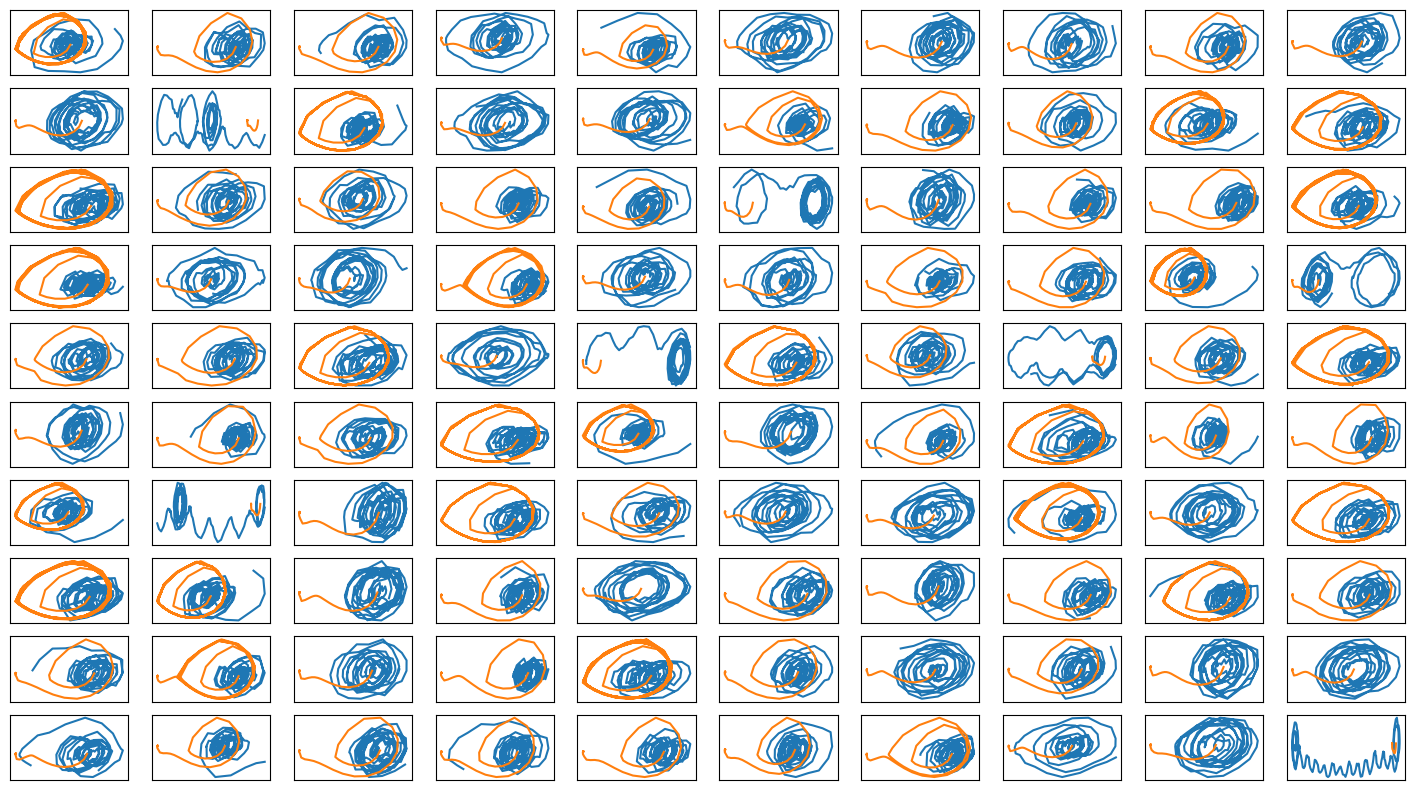

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 1258.28047  validloss 976.17917±0.00000  bestvalidloss 976.17917  last_update 0
train: iter 1  trainloss 507.10089  validloss 410.29078±0.00000  bestvalidloss 410.29078  last_update 0
train: iter 2  trainloss 426.42868  validloss 367.81927±0.00000  bestvalidloss 367.81927  last_update 0
train: iter 3  trainloss 368.39520  validloss 342.43535±0.00000  bestvalidloss 342.43535  last_update 0
train: iter 4  trainloss 341.92376  validloss 322.29614±0.00000  bestvalidloss 322.29614  last_update 0
train: iter 5  trainloss 318.90976  validloss 311.20341±0.00000  bestvalidloss 311.20341  last_update 0
train: iter 6  trainloss 306.11029  validloss 298.54324±0.00000  bestvalidloss 298.54324  last_update 0
train: iter 7  trainloss 294.85093  validloss 288.53796±0.00000  bestvalidloss 288.53796  last_update 0
train: iter 8  trainloss 298.55741  validloss 279.69010±0.00000  bestvalidloss 279.69010  last_update 0
train: iter 9  trainloss 285.78746  validlos

train: iter 78  trainloss -416.34099  validloss -382.68509±0.00000  bestvalidloss -426.25359  last_update 2
train: iter 79  trainloss -434.03636  validloss -459.66643±0.00000  bestvalidloss -459.66643  last_update 0
train: iter 80  trainloss -440.74240  validloss -462.93371±0.00000  bestvalidloss -462.93371  last_update 0
train: iter 81  trainloss -431.65018  validloss -471.35546±0.00000  bestvalidloss -471.35546  last_update 0
train: iter 82  trainloss -449.55026  validloss -488.65374±0.00000  bestvalidloss -488.65374  last_update 0
train: iter 83  trainloss -453.23479  validloss -494.08805±0.00000  bestvalidloss -494.08805  last_update 0
train: iter 84  trainloss -458.22845  validloss -486.96951±0.00000  bestvalidloss -494.08805  last_update 1
train: iter 85  trainloss -451.98173  validloss -500.59732±0.00000  bestvalidloss -500.59732  last_update 0
train: iter 86  trainloss -437.99637  validloss -499.26204±0.00000  bestvalidloss -500.59732  last_update 1
train: iter 87  trainloss -4

train: iter 154  trainloss -569.88063  validloss -645.47934±0.00000  bestvalidloss -650.28397  last_update 2
train: iter 155  trainloss -584.86193  validloss -603.59471±0.00000  bestvalidloss -650.28397  last_update 3
train: iter 156  trainloss -597.81514  validloss -639.55970±0.00000  bestvalidloss -650.28397  last_update 4
train: iter 157  trainloss -610.16433  validloss -649.38031±0.00000  bestvalidloss -650.28397  last_update 5
train: iter 158  trainloss -619.42140  validloss -617.05777±0.00000  bestvalidloss -650.28397  last_update 6
train: iter 159  trainloss -617.65574  validloss -644.50518±0.00000  bestvalidloss -650.28397  last_update 7
train: iter 160  trainloss -621.89947  validloss -655.51547±0.00000  bestvalidloss -655.51547  last_update 0
train: iter 161  trainloss -627.69068  validloss -650.02641±0.00000  bestvalidloss -655.51547  last_update 1
train: iter 162  trainloss -625.40251  validloss -658.34565±0.00000  bestvalidloss -658.34565  last_update 0
train: iter 163  tr

train: iter 230  trainloss -684.04357  validloss -713.73036±0.00000  bestvalidloss -713.89216  last_update 10
train: iter 231  trainloss -684.71690  validloss -703.74909±0.00000  bestvalidloss -713.89216  last_update 11
train: iter 232  trainloss -692.80132  validloss -696.18818±0.00000  bestvalidloss -713.89216  last_update 12
train: iter 233  trainloss -688.89738  validloss -692.73149±0.00000  bestvalidloss -713.89216  last_update 13
train: iter 234  trainloss -690.02163  validloss -715.85876±0.00000  bestvalidloss -715.85876  last_update 0
train: iter 235  trainloss -683.94179  validloss -707.42190±0.00000  bestvalidloss -715.85876  last_update 1
train: iter 236  trainloss -688.80521  validloss -720.39149±0.00000  bestvalidloss -720.39149  last_update 0
train: iter 237  trainloss -689.90579  validloss -705.87111±0.00000  bestvalidloss -720.39149  last_update 1
train: iter 238  trainloss -699.54040  validloss -717.31996±0.00000  bestvalidloss -720.39149  last_update 2
train: iter 239

train: iter 306  trainloss -721.06005  validloss -718.73488±0.00000  bestvalidloss -741.96472  last_update 12
train: iter 307  trainloss -726.54541  validloss -722.23903±0.00000  bestvalidloss -741.96472  last_update 13
train: iter 308  trainloss -717.33786  validloss -736.82393±0.00000  bestvalidloss -741.96472  last_update 14
train: iter 309  trainloss -694.43418  validloss -729.56082±0.00000  bestvalidloss -741.96472  last_update 15
train: iter 310  trainloss -693.58509  validloss -706.60013±0.00000  bestvalidloss -741.96472  last_update 16
train: iter 311  trainloss -517.84736  validloss -591.66932±0.00000  bestvalidloss -741.96472  last_update 17
train: iter 312  trainloss -684.13339  validloss -670.04201±0.00000  bestvalidloss -741.96472  last_update 18
train: iter 313  trainloss -701.27212  validloss -722.27676±0.00000  bestvalidloss -741.96472  last_update 19
train: iter 314  trainloss -718.82357  validloss -691.42121±0.00000  bestvalidloss -741.96472  last_update 20
train: ite

train: iter 381  trainloss -733.82382  validloss -749.51077±0.00000  bestvalidloss -759.67100  last_update 1
train: iter 382  trainloss -718.32374  validloss -746.07514±0.00000  bestvalidloss -759.67100  last_update 2
train: iter 383  trainloss -726.41698  validloss -742.77580±0.00000  bestvalidloss -759.67100  last_update 3
train: iter 384  trainloss -723.94516  validloss -741.88844±0.00000  bestvalidloss -759.67100  last_update 4
train: iter 385  trainloss -727.08572  validloss -755.16544±0.00000  bestvalidloss -759.67100  last_update 5
train: iter 386  trainloss -715.63145  validloss -755.64855±0.00000  bestvalidloss -759.67100  last_update 6
train: iter 387  trainloss -727.67912  validloss -741.61807±0.00000  bestvalidloss -759.67100  last_update 7
train: iter 388  trainloss -730.11541  validloss -742.91008±0.00000  bestvalidloss -759.67100  last_update 8
train: iter 389  trainloss -738.32821  validloss -738.59227±0.00000  bestvalidloss -759.67100  last_update 9
train: iter 390  tr

train: iter 456  trainloss -736.24986  validloss -749.59817±0.00000  bestvalidloss -765.55243  last_update 41
train: iter 457  trainloss -749.51972  validloss -747.57281±0.00000  bestvalidloss -765.55243  last_update 42
train: iter 458  trainloss -747.18984  validloss -753.47989±0.00000  bestvalidloss -765.55243  last_update 43
train: iter 459  trainloss -712.90565  validloss -767.42072±0.00000  bestvalidloss -767.42072  last_update 0
train: iter 460  trainloss -740.95359  validloss -763.96464±0.00000  bestvalidloss -767.42072  last_update 1
train: iter 461  trainloss -718.57488  validloss -733.02303±0.00000  bestvalidloss -767.42072  last_update 2
train: iter 462  trainloss -718.67952  validloss -718.77921±0.00000  bestvalidloss -767.42072  last_update 3
train: iter 463  trainloss -724.83122  validloss -735.00256±0.00000  bestvalidloss -767.42072  last_update 4
train: iter 464  trainloss -729.13286  validloss -743.36800±0.00000  bestvalidloss -767.42072  last_update 5
train: iter 465 

train: iter 531  trainloss -724.33573  validloss -682.51715±0.00000  bestvalidloss -772.47018  last_update 36
train: iter 532  trainloss -733.99730  validloss -765.57539±0.00000  bestvalidloss -772.47018  last_update 37
train: iter 533  trainloss -756.36782  validloss -765.47754±0.00000  bestvalidloss -772.47018  last_update 38
train: iter 534  trainloss -723.23688  validloss -710.28065±0.00000  bestvalidloss -772.47018  last_update 39
train: iter 535  trainloss -726.59485  validloss -752.24079±0.00000  bestvalidloss -772.47018  last_update 40
train: iter 536  trainloss -752.20636  validloss -762.00652±0.00000  bestvalidloss -772.47018  last_update 41
train: iter 537  trainloss -742.46776  validloss -749.57183±0.00000  bestvalidloss -772.47018  last_update 42
train: iter 538  trainloss -748.84225  validloss -740.74846±0.00000  bestvalidloss -772.47018  last_update 43
train: iter 539  trainloss -751.69572  validloss -759.31393±0.00000  bestvalidloss -772.47018  last_update 44
train: ite

train: iter 606  trainloss -743.63002  validloss -746.18432±0.00000  bestvalidloss -778.91093  last_update 12
train: iter 607  trainloss -749.63759  validloss -773.71265±0.00000  bestvalidloss -778.91093  last_update 13
train: iter 608  trainloss -757.46827  validloss -766.19078±0.00000  bestvalidloss -778.91093  last_update 14
train: iter 609  trainloss -747.16936  validloss -776.18812±0.00000  bestvalidloss -778.91093  last_update 15
train: iter 610  trainloss -743.18225  validloss -769.36476±0.00000  bestvalidloss -778.91093  last_update 16
train: iter 611  trainloss -763.61770  validloss -767.66660±0.00000  bestvalidloss -778.91093  last_update 17
train: iter 612  trainloss -760.33883  validloss -773.46718±0.00000  bestvalidloss -778.91093  last_update 18
train: iter 613  trainloss -736.90792  validloss -754.36022±0.00000  bestvalidloss -778.91093  last_update 19
train: iter 614  trainloss -743.66086  validloss -759.71091±0.00000  bestvalidloss -778.91093  last_update 20
train: ite

train: iter 681  trainloss -749.75620  validloss -785.61568±0.00000  bestvalidloss -787.97052  last_update 11
train: iter 682  trainloss -745.80612  validloss -786.33471±0.00000  bestvalidloss -787.97052  last_update 12
train: iter 683  trainloss -711.24843  validloss -760.76329±0.00000  bestvalidloss -787.97052  last_update 13
train: iter 684  trainloss -746.47506  validloss -689.91349±0.00000  bestvalidloss -787.97052  last_update 14
train: iter 685  trainloss -760.91990  validloss -759.79241±0.00000  bestvalidloss -787.97052  last_update 15
train: iter 686  trainloss -743.45846  validloss -740.21119±0.00000  bestvalidloss -787.97052  last_update 16
train: iter 687  trainloss -755.42596  validloss -762.98808±0.00000  bestvalidloss -787.97052  last_update 17
train: iter 688  trainloss -744.96437  validloss -741.32027±0.00000  bestvalidloss -787.97052  last_update 18
train: iter 689  trainloss -761.77453  validloss -765.16413±0.00000  bestvalidloss -787.97052  last_update 19
train: ite

train: iter 756  trainloss -753.99380  validloss -785.78740±0.00000  bestvalidloss -788.18232  last_update 22
train: iter 757  trainloss -755.76988  validloss -749.04349±0.00000  bestvalidloss -788.18232  last_update 23
train: iter 758  trainloss -659.70005  validloss -787.93250±0.00000  bestvalidloss -788.18232  last_update 24
train: iter 759  trainloss -759.59329  validloss -773.56830±0.00000  bestvalidloss -788.18232  last_update 25
train: iter 760  trainloss -757.10235  validloss -781.08204±0.00000  bestvalidloss -788.18232  last_update 26
train: iter 761  trainloss -763.75252  validloss -778.93280±0.00000  bestvalidloss -788.18232  last_update 27
train: iter 762  trainloss -747.35999  validloss -784.61052±0.00000  bestvalidloss -788.18232  last_update 28
train: iter 763  trainloss -703.62269  validloss -767.21036±0.00000  bestvalidloss -788.18232  last_update 29
train: iter 764  trainloss -742.53965  validloss -754.13005±0.00000  bestvalidloss -788.18232  last_update 30
train: ite

train: iter 831  trainloss -747.98466  validloss -770.85578±0.00000  bestvalidloss -796.02025  last_update 6
train: iter 832  trainloss -759.46699  validloss -763.44345±0.00000  bestvalidloss -796.02025  last_update 7
train: iter 833  trainloss -764.75716  validloss -752.53596±0.00000  bestvalidloss -796.02025  last_update 8
train: iter 834  trainloss -760.72817  validloss -766.72292±0.00000  bestvalidloss -796.02025  last_update 9
train: iter 835  trainloss -767.18053  validloss -788.03486±0.00000  bestvalidloss -796.02025  last_update 10
train: iter 836  trainloss -763.00413  validloss -760.09162±0.00000  bestvalidloss -796.02025  last_update 11
train: iter 837  trainloss -763.66715  validloss -783.52430±0.00000  bestvalidloss -796.02025  last_update 12
train: iter 838  trainloss -756.19766  validloss -764.50522±0.00000  bestvalidloss -796.02025  last_update 13
train: iter 839  trainloss -766.81553  validloss -781.66158±0.00000  bestvalidloss -796.02025  last_update 14
train: iter 84

train: iter 906  trainloss -766.36421  validloss -776.66630±0.00000  bestvalidloss -799.49579  last_update 52
train: iter 907  trainloss -737.69803  validloss -692.33699±0.00000  bestvalidloss -799.49579  last_update 53
train: iter 908  trainloss -765.36769  validloss -771.57841±0.00000  bestvalidloss -799.49579  last_update 54
train: iter 909  trainloss -768.16110  validloss -781.37912±0.00000  bestvalidloss -799.49579  last_update 55
train: iter 910  trainloss -775.63360  validloss -774.62133±0.00000  bestvalidloss -799.49579  last_update 56
train: iter 911  trainloss -774.08506  validloss -764.99811±0.00000  bestvalidloss -799.49579  last_update 57
train: iter 912  trainloss -747.26191  validloss -774.58702±0.00000  bestvalidloss -799.49579  last_update 58
train: iter 913  trainloss -763.36330  validloss -720.19895±0.00000  bestvalidloss -799.49579  last_update 59
train: iter 914  trainloss -765.15924  validloss -751.52755±0.00000  bestvalidloss -799.49579  last_update 60
train: ite

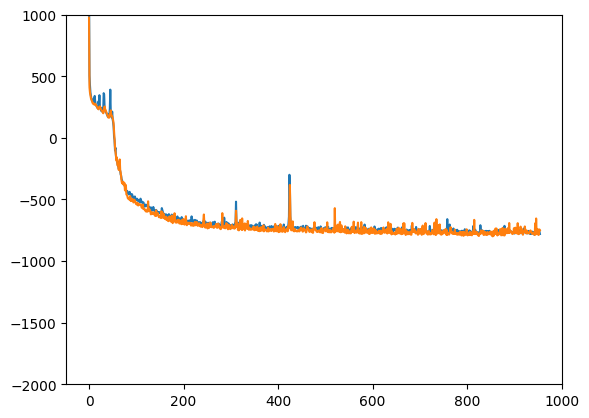

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

実環境方策rollout vs Sim環境方策rollout


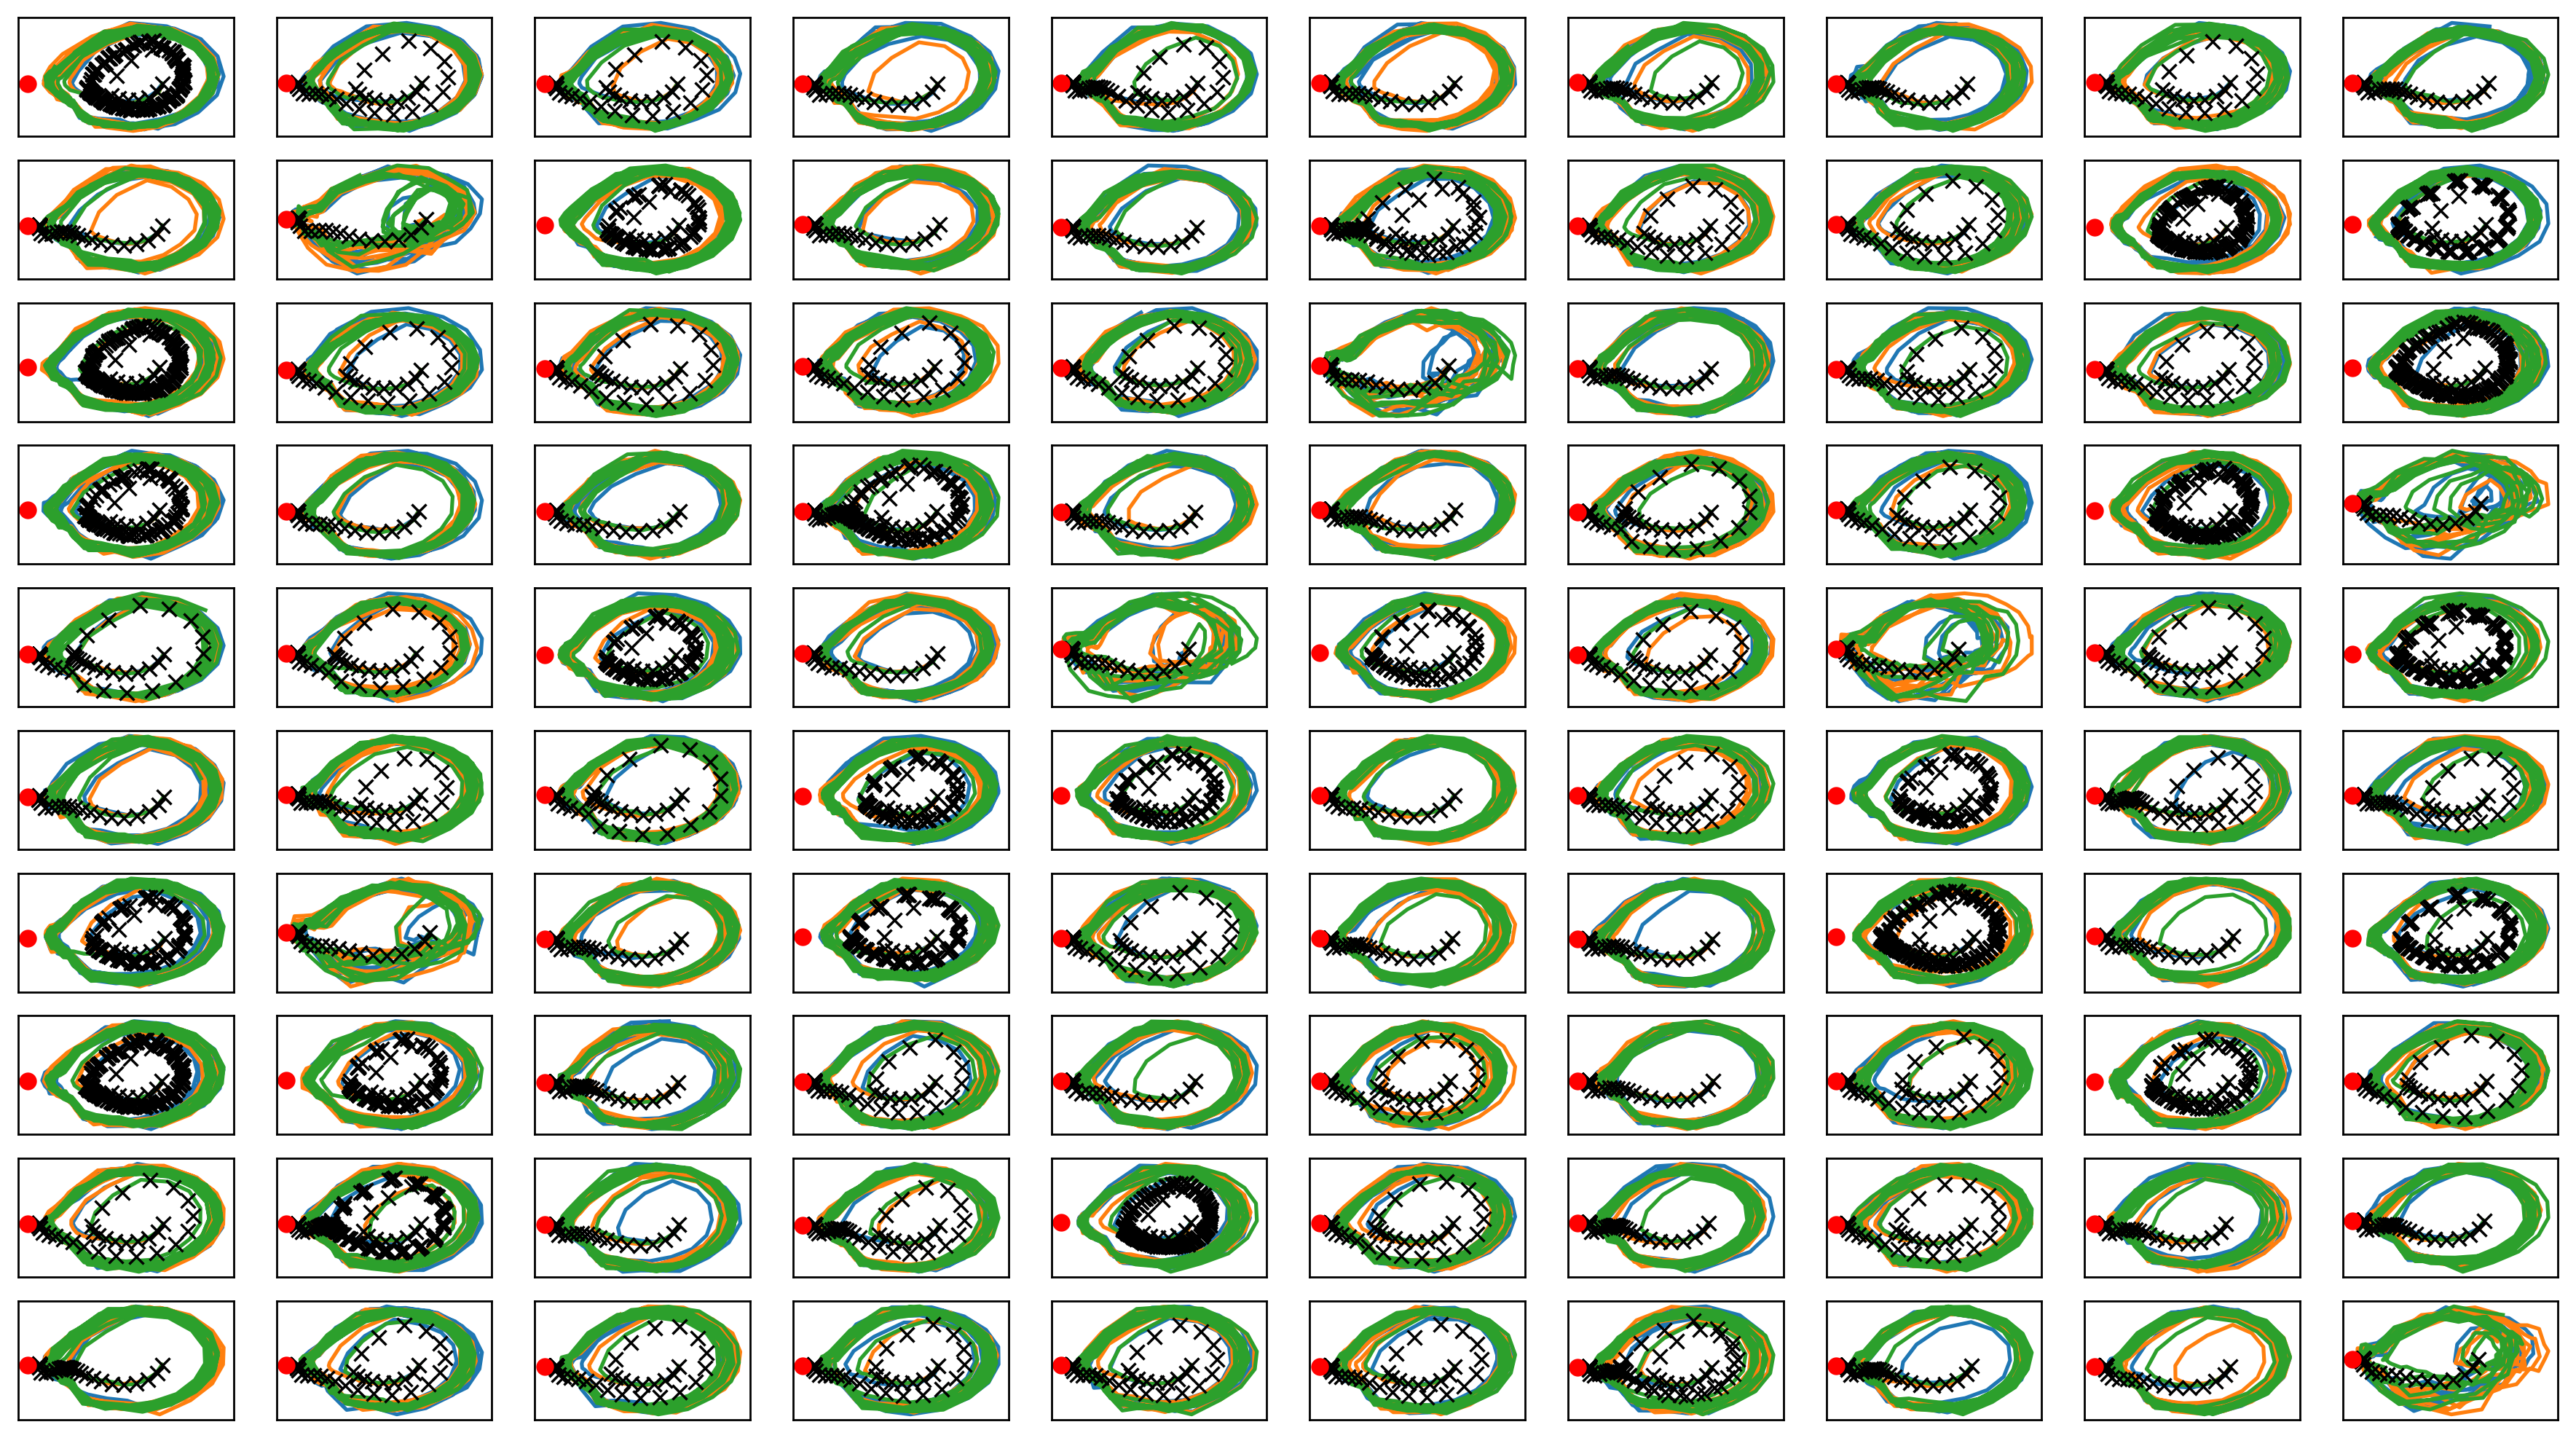

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

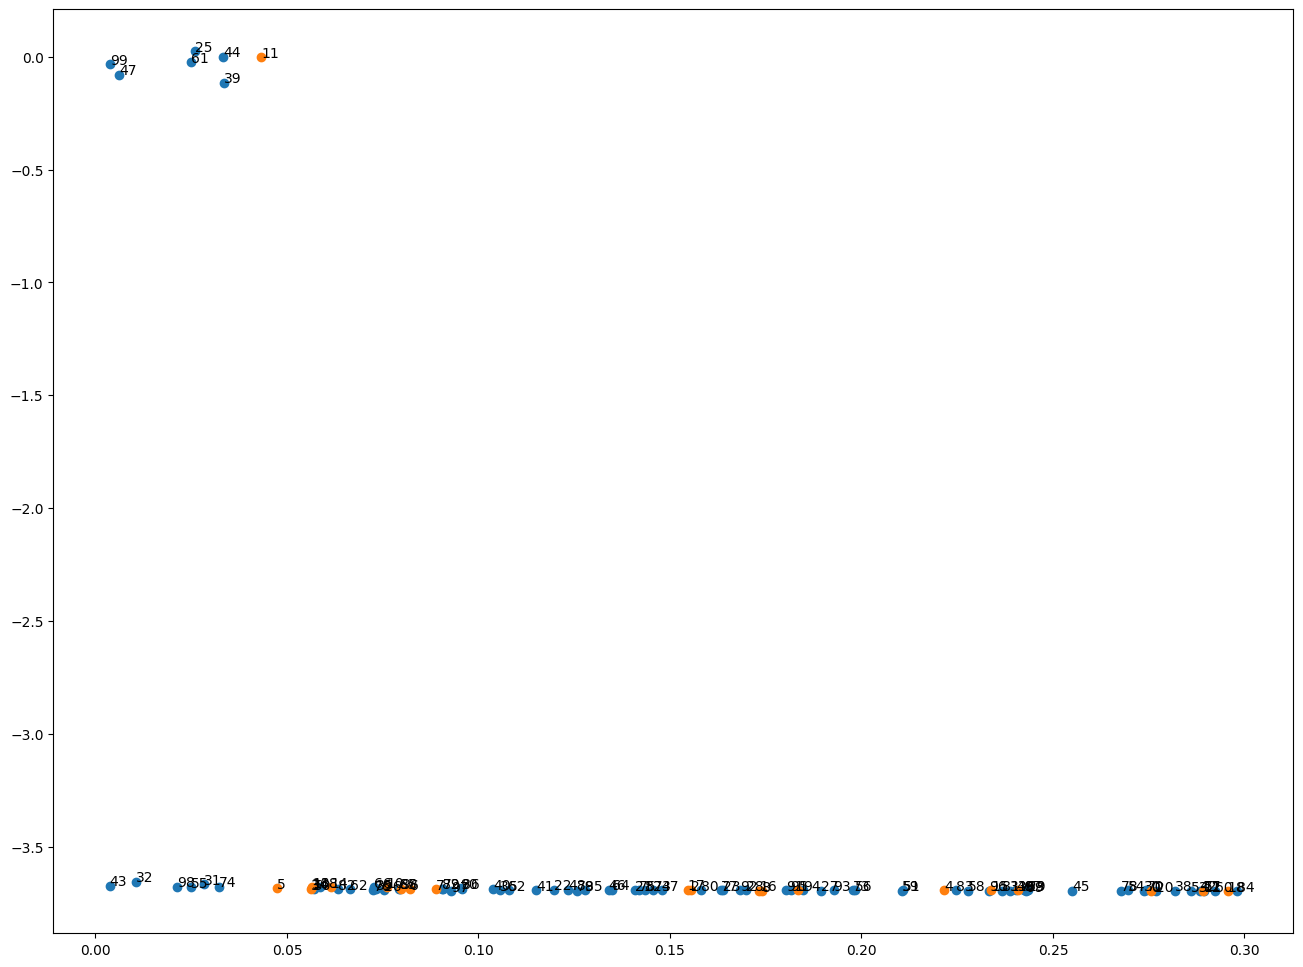

[0.27558327 0.18352316 0.1555254  0.05631637 0.22153209 0.04749296
 0.08222594 0.08882398 0.17395134 0.07974574 0.07607646 0.04324929
 0.28917916 0.0565244  0.06136666 0.23385438 0.17329886 0.15464178
 0.29568732 0.24074907 0.27682488 0.14084651 0.11968344 0.16393695
 0.14547932 0.02595771 0.07537353 0.18952982 0.1698246  0.24357072
 0.27378803 0.02826082 0.01065271 0.23884282 0.05660032 0.07328726
 0.10562848 0.14802452 0.28178981 0.03350773 0.10380845 0.11502272
 0.28833092 0.00371082 0.03333322 0.25499401 0.13398235 0.00611741
 0.12341508 0.24042046 0.05714333 0.21088262 0.10799496 0.28608915
 0.26957135 0.02482157 0.19825332 0.28954726 0.22772974 0.21046585
 0.29230484 0.02491633 0.06644483 0.24309427 0.13492307 0.07927151
 0.0726323  0.24233323 0.05860339 0.24308566 0.2744203  0.28949899
 0.09075543 0.19782518 0.03224686 0.14184845 0.07255772 0.16326971
 0.26769998 0.12559623 0.15815365 0.23670303 0.0633423  0.22457274
 0.2980512  0.1276912  0.09559393 0.14338239 0.07956907 0.0905

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


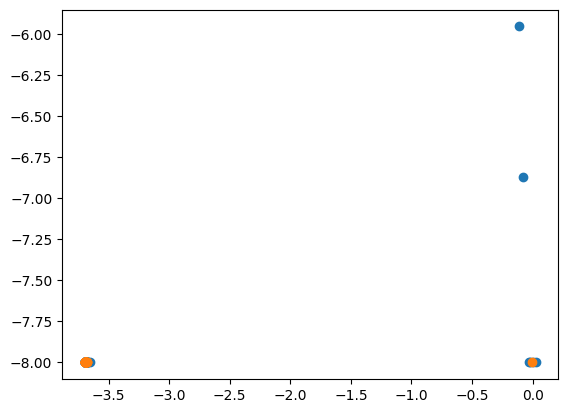

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 6.89198  validloss 7.38158±0.00000  bestvalidloss 7.38158  last_update 0
train: iter 1  trainloss 6.29029  validloss 6.71066±0.00000  bestvalidloss 6.71066  last_update 0
train: iter 2  trainloss 5.77956  validloss 6.13968±0.00000  bestvalidloss 6.13968  last_update 0
train: iter 3  trainloss 5.32241  validloss 5.64984±0.00000  bestvalidloss 5.64984  last_update 0
train: iter 4  trainloss 4.96485  validloss 5.24070±0.00000  bestvalidloss 5.24070  last_update 0
train: iter 5  trainloss 4.64166  validloss 4.87733±0.00000  bestvalidloss 4.87733  last_update 0
train: iter 6  trainloss 4.36555  validloss 4.58079±0.00000  bestvalidloss 4.58079  last_update 0
train: iter 7  trainloss 4.11809  validloss 4.31695±0.00000  bestvalidloss 4.31695  last_update 0
train: iter 8  trainloss 3.89910  validloss 4.07271±0.00000  bestvalidloss 4.07271  last_update 0
train: iter 9  trainloss 3.71063  validloss 3.87767±0.00000  bestvalidloss 3.87767  last_update 0
train: iter 10  trai

train: iter 83  trainloss 1.40900  validloss 1.30594±0.00000  bestvalidloss 1.30594  last_update 0
train: iter 84  trainloss 1.41078  validloss 1.30677±0.00000  bestvalidloss 1.30594  last_update 1
train: iter 85  trainloss 1.40564  validloss 1.30893±0.00000  bestvalidloss 1.30594  last_update 2
train: iter 86  trainloss 1.40485  validloss 1.30376±0.00000  bestvalidloss 1.30376  last_update 0
train: iter 87  trainloss 1.40136  validloss 1.29359±0.00000  bestvalidloss 1.29359  last_update 0
train: iter 88  trainloss 1.39837  validloss 1.28907±0.00000  bestvalidloss 1.28907  last_update 0
train: iter 89  trainloss 1.39947  validloss 1.29022±0.00000  bestvalidloss 1.28907  last_update 1
train: iter 90  trainloss 1.39634  validloss 1.28569±0.00000  bestvalidloss 1.28569  last_update 0
train: iter 91  trainloss 1.39279  validloss 1.28913±0.00000  bestvalidloss 1.28569  last_update 1
train: iter 92  trainloss 1.39325  validloss 1.28672±0.00000  bestvalidloss 1.28569  last_update 2
train: ite

train: iter 169  trainloss 1.38493  validloss 1.23546±0.00000  bestvalidloss 1.23303  last_update 9
train: iter 170  trainloss 1.38664  validloss 1.24334±0.00000  bestvalidloss 1.23303  last_update 10
train: iter 171  trainloss 1.38798  validloss 1.23892±0.00000  bestvalidloss 1.23303  last_update 11
train: iter 172  trainloss 1.37853  validloss 1.23588±0.00000  bestvalidloss 1.23303  last_update 12
train: iter 173  trainloss 1.38492  validloss 1.23931±0.00000  bestvalidloss 1.23303  last_update 13
train: iter 174  trainloss 1.38506  validloss 1.23742±0.00000  bestvalidloss 1.23303  last_update 14
train: iter 175  trainloss 1.37327  validloss 1.23850±0.00000  bestvalidloss 1.23303  last_update 15
train: iter 176  trainloss 1.38255  validloss 1.23951±0.00000  bestvalidloss 1.23303  last_update 16
train: iter 177  trainloss 1.38050  validloss 1.23524±0.00000  bestvalidloss 1.23303  last_update 17
train: iter 178  trainloss 1.38233  validloss 1.24231±0.00000  bestvalidloss 1.23303  last_u

train: iter 254  trainloss 1.37669  validloss 1.22952±0.00000  bestvalidloss 1.22590  last_update 44
train: iter 255  trainloss 1.37903  validloss 1.22995±0.00000  bestvalidloss 1.22590  last_update 45
train: iter 256  trainloss 1.37839  validloss 1.23465±0.00000  bestvalidloss 1.22590  last_update 46
train: iter 257  trainloss 1.38238  validloss 1.23574±0.00000  bestvalidloss 1.22590  last_update 47
train: iter 258  trainloss 1.37809  validloss 1.24136±0.00000  bestvalidloss 1.22590  last_update 48
train: iter 259  trainloss 1.38114  validloss 1.23726±0.00000  bestvalidloss 1.22590  last_update 49
train: iter 260  trainloss 1.38195  validloss 1.23621±0.00000  bestvalidloss 1.22590  last_update 50
train: iter 261  trainloss 1.38235  validloss 1.23474±0.00000  bestvalidloss 1.22590  last_update 51
train: iter 262  trainloss 1.38175  validloss 1.23774±0.00000  bestvalidloss 1.22590  last_update 52
train: iter 263  trainloss 1.38527  validloss 1.23443±0.00000  bestvalidloss 1.22590  last_

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([-3.4178, -0.0668], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 17.66046  validloss 22.46691±0.00000  bestvalidloss 22.46691  last_update 0
train: iter 1  trainloss 8.95656  validloss 12.40494±0.00000  bestvalidloss 12.40494  last_update 0
train: iter 2  trainloss 4.97690  validloss 6.17215±0.00000  bestvalidloss 6.17215  last_update 0
train: iter 3  trainloss 3.59443  validloss 3.86122±0.00000  bestvalidloss 3.86122  last_update 0
train: iter 4  trainloss 3.02505  validloss 3.08213±0.00000  bestvalidloss 3.08213  last_update 0
train: iter 5  trainloss 2.69305  validloss 2.70030±0.00000  bestvalidloss 2.70030  last_update 0
train: iter 6  trainloss 2.50939  validloss 2.52887±0.00000  bestvalidloss 2.52887  last_update 0
train: iter 7  trainloss 2.32524  validloss 2.42734±0.00000  bestvalidloss 2.42734  last_update 0
train: iter 8  trainloss 2.23792  validloss 2.39491±0.00000  bestvalidloss 2.39491  last_update 0
train: iter 9  trainloss 2.14438  validloss 2.36252±0.00000  bestvalidloss 2.36252  last_update 0
train: iter 10 

train: iter 83  trainloss 1.77651  validloss 1.88461±0.00000  bestvalidloss 1.84055  last_update 7
train: iter 84  trainloss 1.78217  validloss 1.95661±0.00000  bestvalidloss 1.84055  last_update 8
train: iter 85  trainloss 1.78092  validloss 1.89142±0.00000  bestvalidloss 1.84055  last_update 9
train: iter 86  trainloss 1.77618  validloss 1.91843±0.00000  bestvalidloss 1.84055  last_update 10
train: iter 87  trainloss 1.78762  validloss 1.87467±0.00000  bestvalidloss 1.84055  last_update 11
train: iter 88  trainloss 1.80021  validloss 1.90061±0.00000  bestvalidloss 1.84055  last_update 12
train: iter 89  trainloss 1.80736  validloss 1.91504±0.00000  bestvalidloss 1.84055  last_update 13
train: iter 90  trainloss 1.78301  validloss 1.92534±0.00000  bestvalidloss 1.84055  last_update 14
train: iter 91  trainloss 1.79658  validloss 1.91878±0.00000  bestvalidloss 1.84055  last_update 15
train: iter 92  trainloss 1.79571  validloss 1.92886±0.00000  bestvalidloss 1.84055  last_update 16
tra

train: iter 167  trainloss 1.78633  validloss 1.91632±0.00000  bestvalidloss 1.84055  last_update 91
train: iter 168  trainloss 1.80304  validloss 1.90613±0.00000  bestvalidloss 1.84055  last_update 92
train: iter 169  trainloss 1.80344  validloss 1.91528±0.00000  bestvalidloss 1.84055  last_update 93
train: iter 170  trainloss 1.78823  validloss 1.94362±0.00000  bestvalidloss 1.84055  last_update 94
train: iter 171  trainloss 1.78240  validloss 1.91621±0.00000  bestvalidloss 1.84055  last_update 95
train: iter 172  trainloss 1.76727  validloss 1.90387±0.00000  bestvalidloss 1.84055  last_update 96
train: iter 173  trainloss 1.79288  validloss 1.88002±0.00000  bestvalidloss 1.84055  last_update 97
train: iter 174  trainloss 1.76800  validloss 1.91668±0.00000  bestvalidloss 1.84055  last_update 98
train: iter 175  trainloss 1.79620  validloss 1.92215±0.00000  bestvalidloss 1.84055  last_update 99
train: iter 176  trainloss 1.77330  validloss 1.92162±0.00000  bestvalidloss 1.84055  last_

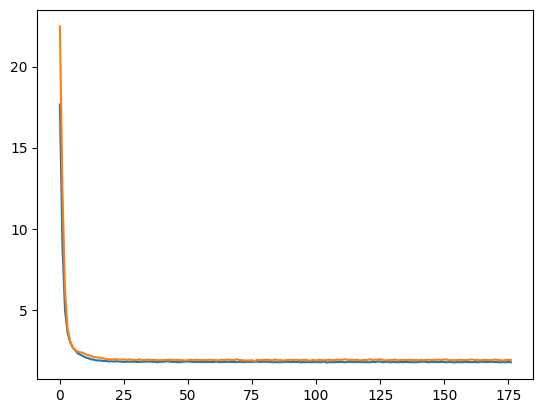

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(-3.4846)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(11.8451)


In [21]:
print(vi.h_min_tilde)

-6.028005


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.0416797347304246
tensor([0.0872])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

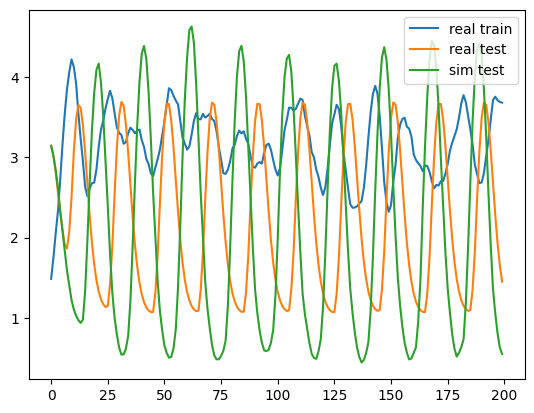

encoder [-3.691317 -8.      ]
initial_belief tensor([-3.4178, -0.0668])
real train tensor([-3.6997, -8.0167])
real test tensor([-3.6826, -8.0036])
sim tensor([-3.6972, -7.9983])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-3.6938775510204085


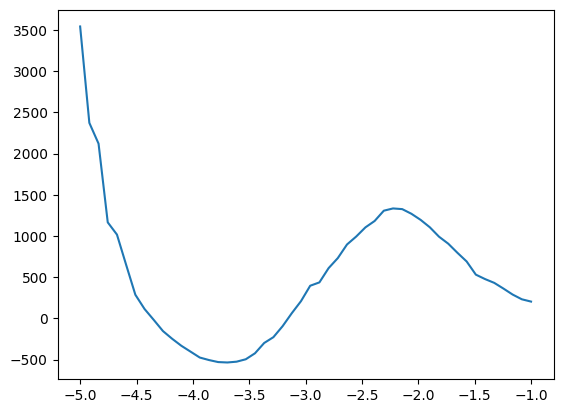

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.338462034938247
tensor([-0.7469])
